# 1. Data Details

## File descriptions
  •	Data.csv – Dataset used for modeling
  
  •	program.ipynb – Jupyter notebook which contain exploration and modelling program
  
## Data fields
   Here are the data fields. I collected this 
•	MON- Month

•	YRS- Year

•	POP- Population 

•	IPI- Monthly import price index for BEA End Use, All commodities

•	EPI- Monthly export price index for BEA End Use, All commodities

•	Em- All employees, thousands, total nonfarm

•	UR- Unemployment Rate

•	Totalun- Total unemployed, plus all persons marginally attached to the labor force, plus total employed part time for           economic reasons, as a percent of the civilian labor force plus all persons marginally attached to the labor force (U-6)

•	APDF- Average Price Data Food

•	APDG- Average Price Data Gasoline

•	APDHHF- Average Price Data House holdfuels

•	SEP- Stock exchange price

•	HU- Annual Estimates of Housing Units for the United States

•	HPI-House Price Index

## Data Preparation 
   I collected this data from-
1.	Employment- https://beta.bls.gov/dataQuery/find?fq=survey:[ce]&q=ce
2.	Average Price Data- https://download.bls.gov/pub/time.series/ap/ 
3.	Import/export- https://beta.bls.gov/dataQuery/find?fq=survey:%5Bei%5D&s=popularity:D 
4.	Population- https://www.multpl.com/united-states-population/table/by-month 
5.	Stock exchange- https://www.multpl.com/s-p-500-historical-prices/table/by-month 
6.	Unemployment- https://www.bls.gov/data/#employment
7.	Housing Units for the United States- https://fred.stlouisfed.org/series/HOUST#0


# 2.	Data Exploration



## Libraries & Tools

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


## Loading Data

In [2]:
dataset=pd.read_csv('Data.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(252, 15)


In [3]:
## print the top5 records
dataset.head(5)

,SR.NO,MON,YRS,POP,IPI,EPI,Em,UR,Totalun,APDF,APDG,APDHHF,SEP,HU,HPI
0,1,1,2000,280.73,97.8,99.2,131005,4.0,7.0,0.286,1.301,1.189,757.13,1636,230.13
1,2,2,2000,280.94,99.7,99.6,131124,4.1,7.1,0.267,1.369,1.614,805.23,1737,230.13
2,3,3,2000,281.16,99.9,100.0,131596,4.0,7.1,0.285,1.541,1.359,837.03,1604,230.13
3,4,4,2000,281.42,98.5,100.0,131888,3.8,6.9,0.283,1.506,1.286,846.63,1626,233.88
4,5,5,2000,281.64,98.8,100.2,132105,4.0,7.1,0.302,1.498,1.263,848.15,1575,233.88


## Missing Values

In [4]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

In [5]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['HPI'].median().plot.bar()
    plt.title(feature)
    plt.show()

## Numerical variables

In [6]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  15


,SR.NO,MON,YRS,POP,IPI,EPI,Em,UR,Totalun,APDF,APDG,APDHHF,SEP,HU,HPI
0,1,1,2000,280.73,97.8,99.2,131005,4.0,7.0,0.286,1.301,1.189,757.13,1636,230.13
1,2,2,2000,280.94,99.7,99.6,131124,4.1,7.1,0.267,1.369,1.614,805.23,1737,230.13
2,3,3,2000,281.16,99.9,100.0,131596,4.0,7.1,0.285,1.541,1.359,837.03,1604,230.13
3,4,4,2000,281.42,98.5,100.0,131888,3.8,6.9,0.283,1.506,1.286,846.63,1626,233.88
4,5,5,2000,281.64,98.8,100.2,132105,4.0,7.1,0.302,1.498,1.263,848.15,1575,233.88


In [7]:
# list of variables that contain year and month information
year_feature = [feature for feature in numerical_features if 'YRS' in feature or 'MON' in feature]

year_feature

['MON', 'YRS']

In [8]:
# let's explore the content of these year and month variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

MON [ 1  2  3  4  5  6  7  8  9 10 11 12]
YRS [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]


#### Relation between House Price Index and Year

Text(0.5, 1.0, 'HPI vs Year')

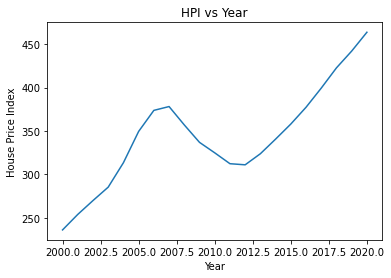

In [9]:
dataset.groupby('YRS')['HPI'].median().plot()
plt.xlabel('Year')
plt.ylabel('House Price Index')
plt.title("HPI vs Year")


#### Year and Month feature

In [10]:
year_feature

['MON', 'YRS']

#### Compare the Year and Month feature with House Price Index

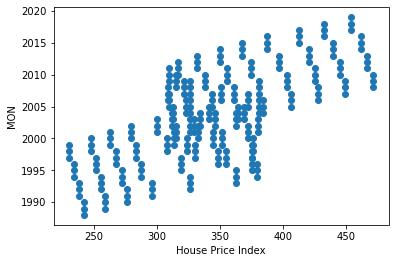

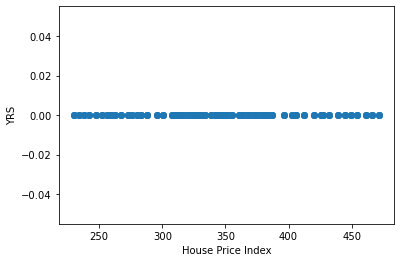

In [11]:
for feature in year_feature:
    if feature!='Y':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YRS']-data[feature]

        plt.scatter(data['HPI'],data[feature])
        plt.ylabel(feature)
        plt.xlabel('House Price Index')
        plt.show()

## Continuous Variable

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in year_feature+['SR.NO']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


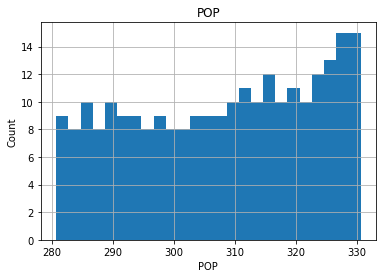

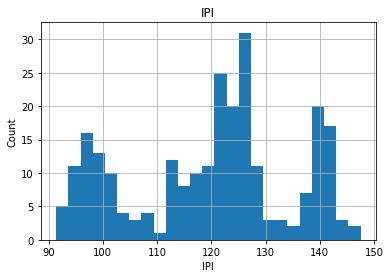

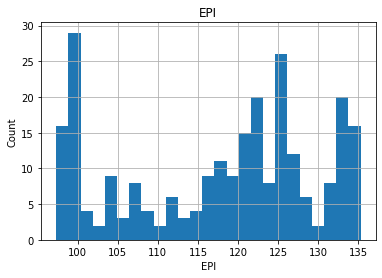

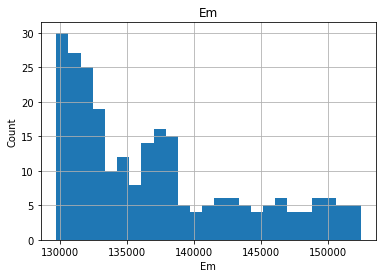

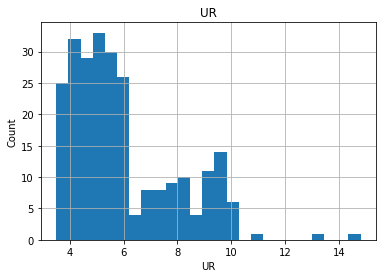

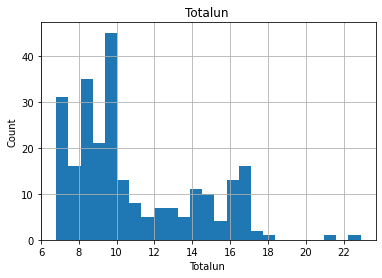

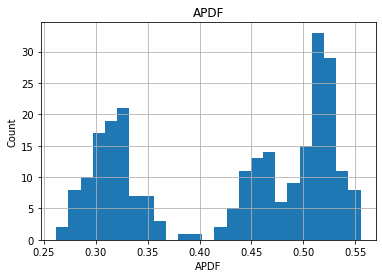

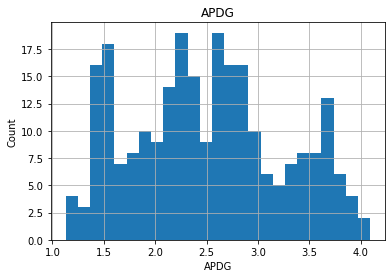

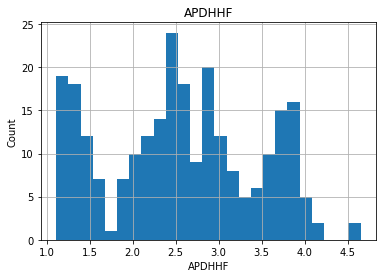

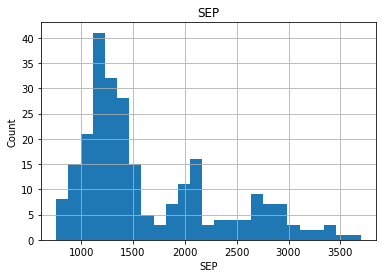

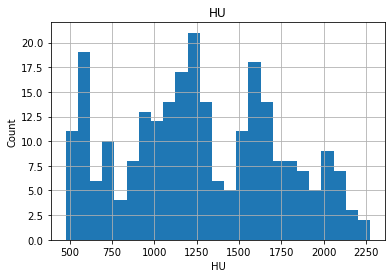

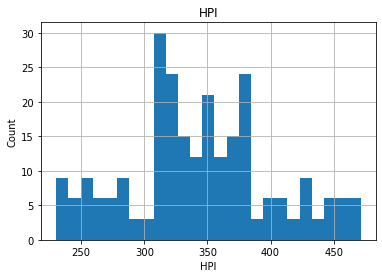

In [13]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [14]:
dataset.columns

Index(['SR.NO', 'MON', 'YRS', 'POP', 'IPI', 'EPI', 'Em', 'UR', 'Totalun ',
       'APDF', 'APDG', 'APDHHF', 'SEP', 'HU', 'HPI'],
      dtype='object')

In [15]:
continuous_data = dataset.loc[:, continuous_feature]

In [16]:
labels = continuous_data.HPI
continuous_data.drop("HPI", axis=1, inplace=True)
continuous_col = list(continuous_data.columns)

Now let's plot an histogram of all the features in the continuous variables to get a feel of the type of data we are dealing with

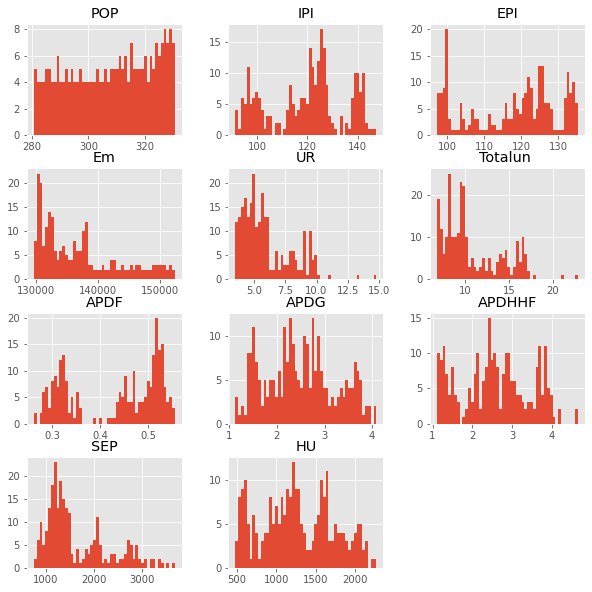

In [17]:
plt.style.use("ggplot")
continuous_data.hist(bins=50, figsize=(10,10))
plt.show()

#### Relation between Continuous feature and Year

Text(0.5, 1.0, 'IPI vs Year')

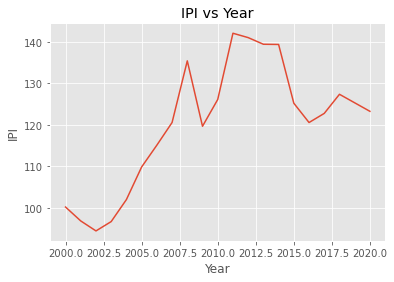

In [18]:
dataset.groupby('YRS')['IPI'].median().plot()
plt.xlabel('Year')
plt.ylabel('IPI')
plt.title("IPI vs Year")


Text(0.5, 1.0, 'EPI vs Year')

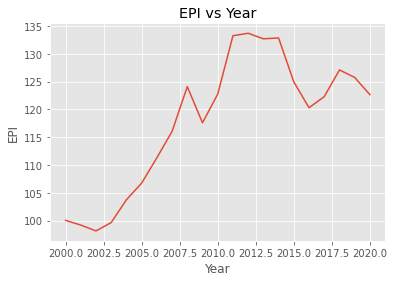

In [19]:
dataset.groupby('YRS')['EPI'].median().plot()
plt.xlabel('Year')
plt.ylabel('EPI')
plt.title("EPI vs Year")

Text(0.5, 1.0, 'Average Price Data_Food vs Year')

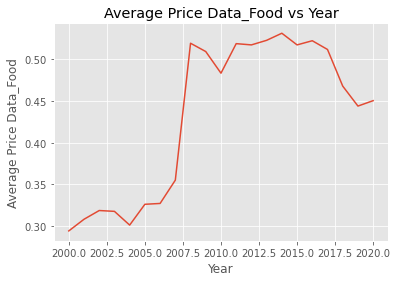

In [20]:
dataset.groupby('YRS')['APDF'].median().plot()
plt.xlabel('Year')
plt.ylabel('Average Price Data_Food')
plt.title("Average Price Data_Food vs Year")

Text(0.5, 1.0, 'Average Price Data_Gasoline vs Year')

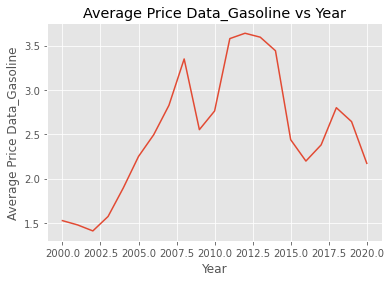

In [21]:
dataset.groupby('YRS')['APDG'].median().plot()
plt.xlabel('Year')
plt.ylabel('Average Price Data_Gasoline')
plt.title("Average Price Data_Gasoline vs Year")

Text(0.5, 1.0, 'Average Price Data_Householdfuels vs Year')

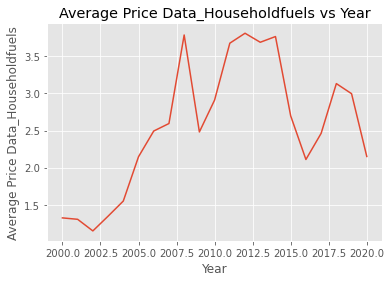

In [22]:
dataset.groupby('YRS')['APDHHF'].median().plot()
plt.xlabel('Year')
plt.ylabel('Average Price Data_Householdfuels')
plt.title("Average Price Data_Householdfuels vs Year")

Text(0.5, 1.0, 'Unemployment Rate vs Year')

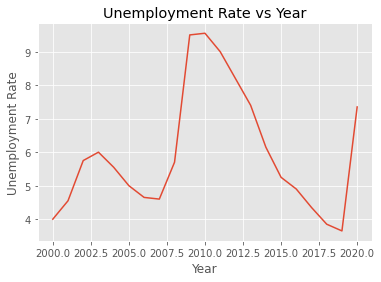

In [23]:
dataset.groupby('YRS')['UR'].median().plot()
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title("Unemployment Rate vs Year")

Text(0.5, 1.0, 'Stock_exchange_price vs Year')

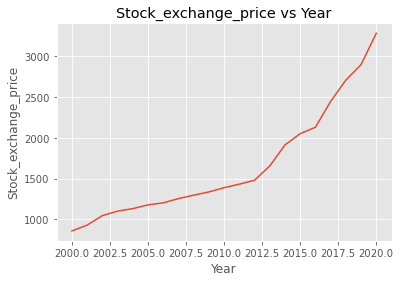

In [24]:
dataset.groupby('YRS')['SEP'].median().plot()
plt.xlabel('Year')
plt.ylabel('Stock_exchange_price')
plt.title("Stock_exchange_price vs Year")

### Logarithmic Transformation

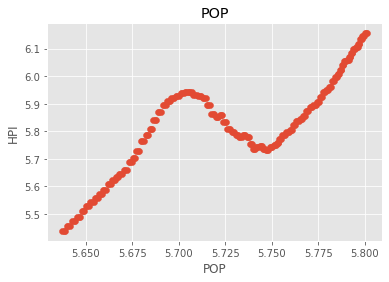

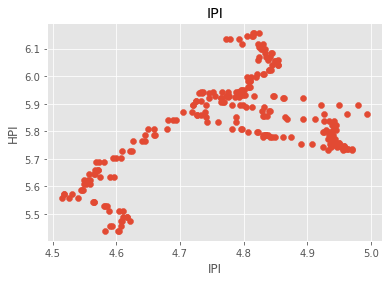

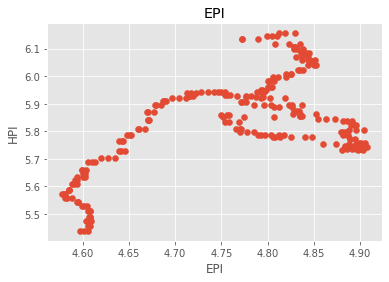

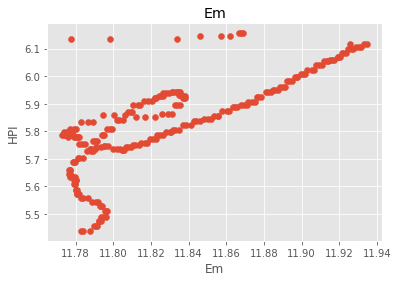

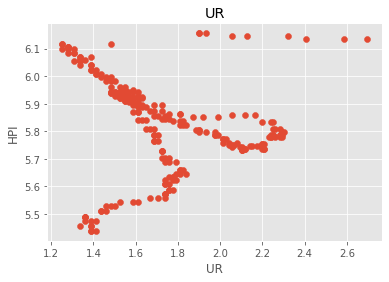

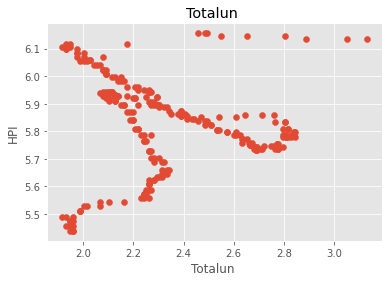

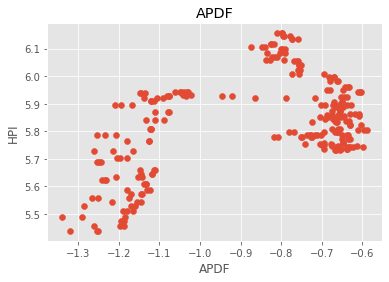

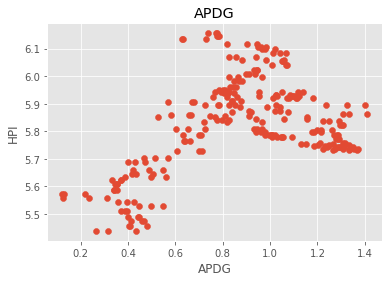

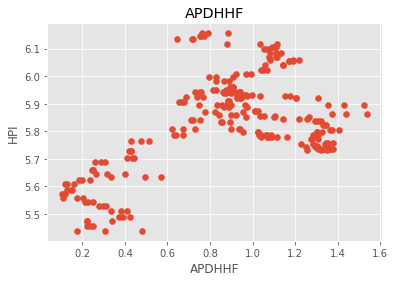

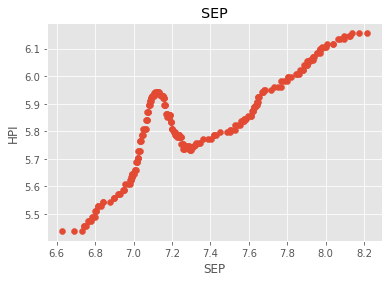

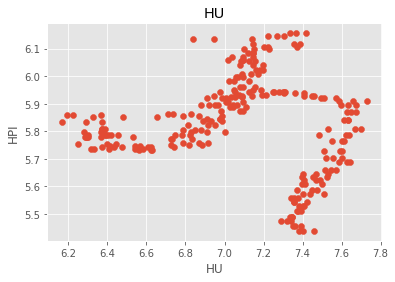

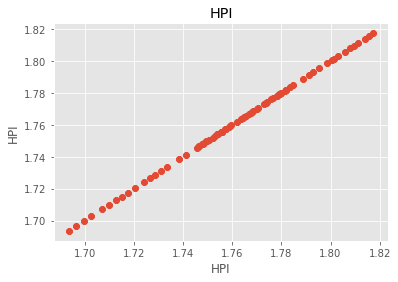

In [25]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['HPI']=np.log(data['HPI'])
        plt.scatter(data[feature],data['HPI'])
        plt.xlabel(feature)
        plt.ylabel('HPI')
        plt.title(feature)
        plt.show()

## Outlier

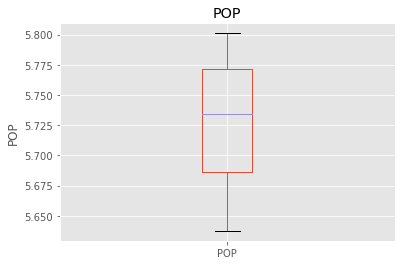

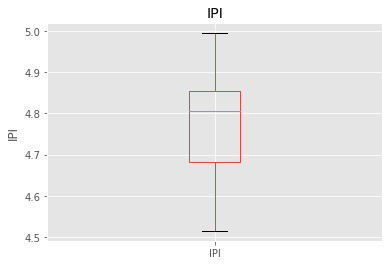

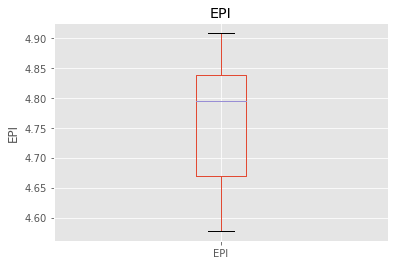

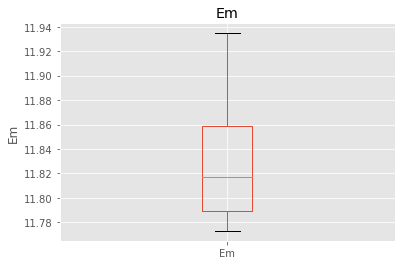

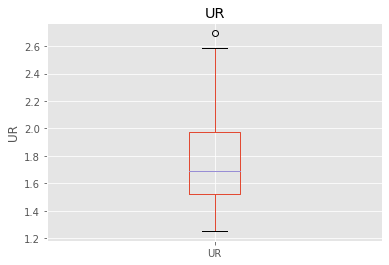

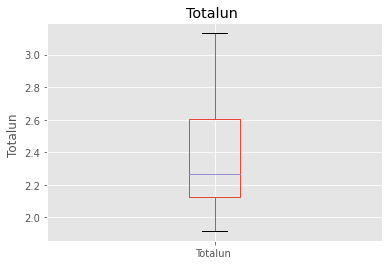

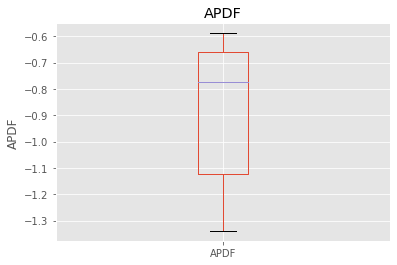

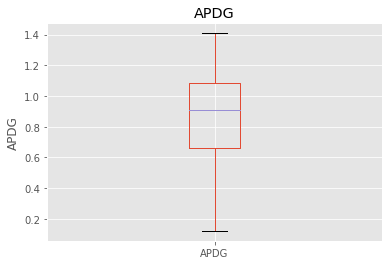

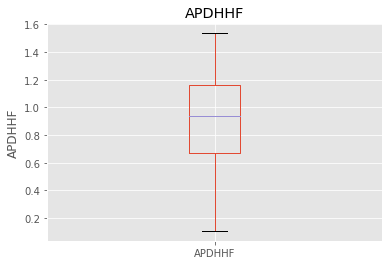

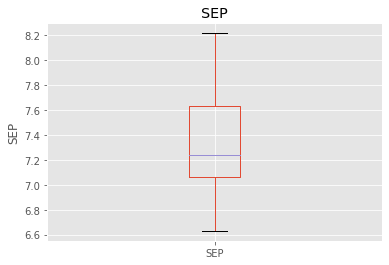

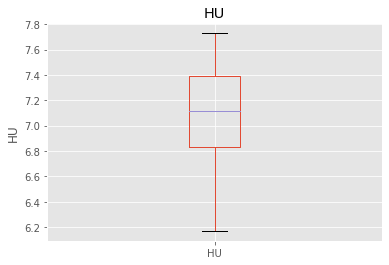

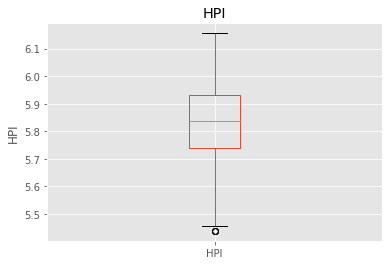

In [26]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [27]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

[]

###### Creating Dummies for Train and Test Data

In [28]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['HPI'],test_size=0.1,random_state=0)

In [29]:
X_train.shape, X_test.shape

((226, 15), (26, 15))

In [30]:

dataset.head()

,SR.NO,MON,YRS,POP,IPI,EPI,Em,UR,Totalun,APDF,APDG,APDHHF,SEP,HU,HPI
0,1,1,2000,280.73,97.8,99.2,131005,4.0,7.0,0.286,1.301,1.189,757.13,1636,230.13
1,2,2,2000,280.94,99.7,99.6,131124,4.1,7.1,0.267,1.369,1.614,805.23,1737,230.13
2,3,3,2000,281.16,99.9,100.0,131596,4.0,7.1,0.285,1.541,1.359,837.03,1604,230.13
3,4,4,2000,281.42,98.5,100.0,131888,3.8,6.9,0.283,1.506,1.286,846.63,1626,233.88
4,5,5,2000,281.64,98.8,100.2,132105,4.0,7.1,0.302,1.498,1.263,848.15,1575,233.88


In [31]:
## drop dependent feature from dataset
X_train=X_train.drop(['SR.NO','HPI','MON','YRS'],axis=1)
X_test=X_test.drop(['SR.NO','HPI','MON','YRS'],axis=1)

## 3.	Modelling


In [32]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     228.0
Date:                Tue, 26 Jan 2021   Prob (F-statistic):          1.33e-111
Time:                        07:41:59   Log-Likelihood:                -952.84
No. Observations:                 226   AIC:                             1930.
Df Residuals:                     214   BIC:                             1971.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1995.5796    175.135    -11.394      0.0

In [33]:
predictions = est2.predict(sm.add_constant(X_test))

In [34]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    if train == True:
        pred = model.predict(x_train_std)
        
        print("Train Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        
    print()
    
    if train == False:
        pred = model.predict(x_test)
        
        print("Test Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")

In [35]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.1)
ls.fit(X_train, y_train)

evaluation(ls, X_train, y_train, X_test, y_test, True)
evaluation(ls, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 16.855749031154797
_______________________________________________
Mean Squared Error: 284.11627540127586
_______________________________________________
Mean Absolute Error: 
12.611151991199515
_______________________________________________


Test Result:
Root Mean Squared Error: 24.624263785751815
_______________________________________________
Mean Squared Error: 606.3543669902883
_______________________________________________
Mean Absolute Error: 
18.20578390154265
_______________________________________________


D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35432.74574230905, tolerance: 77.30502309504425
  model = cd_fast.enet_coordinate_descent(


In [36]:
from sklearn.linear_model import Ridge
ridge = Lasso(alpha = 0.1)
ridge.fit(X_train, y_train)

evaluation(ridge, X_train, y_train, X_test, y_test, True)
evaluation(ridge, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 16.855749031154797
_______________________________________________
Mean Squared Error: 284.11627540127586
_______________________________________________
Mean Absolute Error: 
12.611151991199515
_______________________________________________


Test Result:
Root Mean Squared Error: 24.624263785751815
_______________________________________________
Mean Squared Error: 606.3543669902883
_______________________________________________
Mean Absolute Error: 
18.20578390154265
_______________________________________________


D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35432.74574230905, tolerance: 77.30502309504425
  model = cd_fast.enet_coordinate_descent(


# Conclusion

We can see the key variables affecting the House Price Index (HPI) from the 20-year period dataset (2000–2020) are

•	APDF- Average Price Data Food

•	APDHHF- Average Price Data House holdfuels

•	SEP- Stock exchange price

•	UR- Unemployment Rate

•	IPI- Monthly import price index for BEA End Use, All commodities

•	EPI- Monthly export price index for BEA End Use, All commodities

•	POP- Population 


The impact of Recession and COVID-19 event are the mainly affect for falling of HPI in Untied States as well as over world.

Therefore,the above factors will influence home prices index (HPI) in the United States over the next 10 years.

We need to further analyze this dataset by combining with COVID-19 dataset and understand the relationship between the 'House Price Index (HPI)' and 'Number of Confirmed COVID-19 cases'. And the Goverment Policy on immigration affect on residential home prices can also be further analysed.
